In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
calories = pd.read_csv('calories.csv')

In [7]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
exercise = pd.read_csv('exercise.csv')

In [9]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
#Combining the datasets
df = pd.merge(calories , exercise , on = 'User_ID' , how = 'inner')

In [11]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
df.isnull().sum()

,0
User_ID,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [14]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [15]:
sns.set()

In [16]:
df['Gender'] = df['Gender'].map({'male' : 0 , 'female' : 1})
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


Text(0.5, 1.0, 'Correlation Matrix')

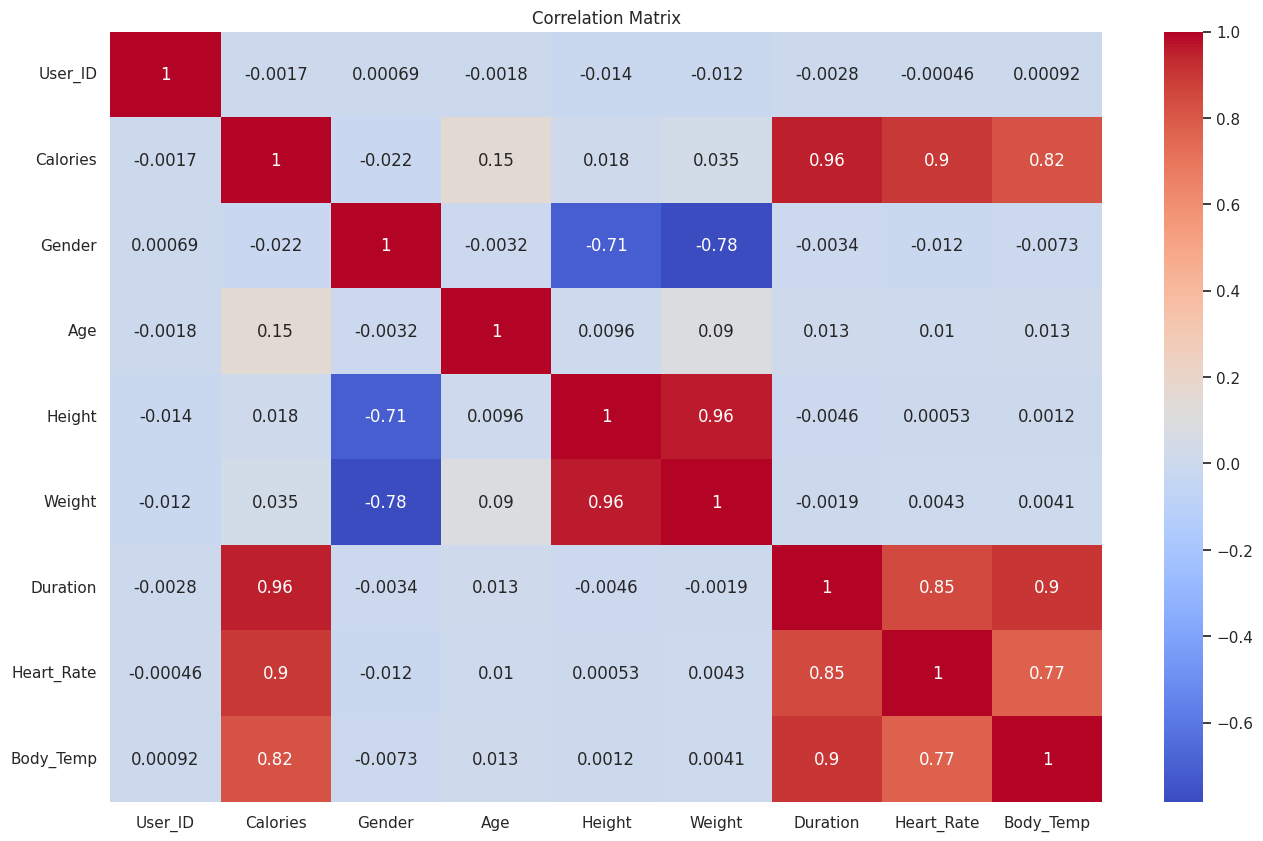

In [17]:
plt.figure(figsize=(16 , 10))
sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm')
plt.title('Correlation Matrix')


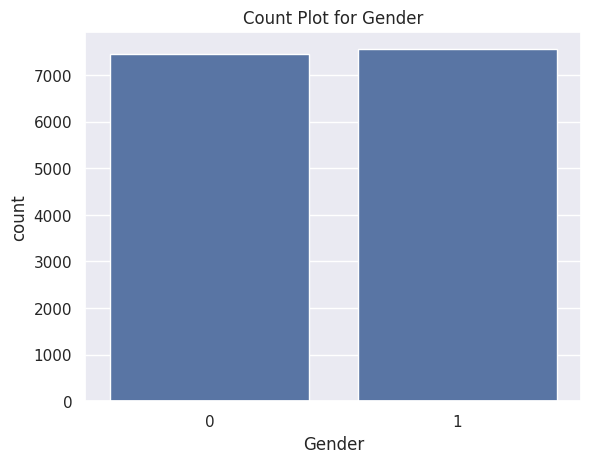

In [20]:
#Count plot for Gender
sns.countplot(x='Gender', data=df)
plt.title('Count Plot for Gender')
plt.show()

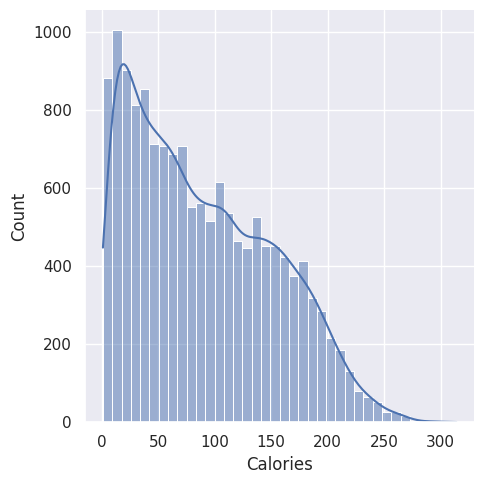

In [25]:
sns.displot(df['Calories'] , kde = True)

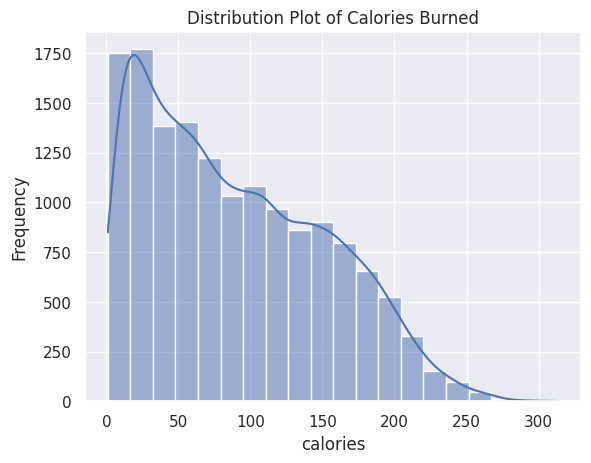

In [26]:
#Distribution Plot of Calories Burned
sns.histplot(df['Calories'] , bins = 20 , kde = True)
plt.title('Distribution Plot of Calories Burned')
plt.xlabel("calories")
plt.ylabel("Frequency")
plt.show()

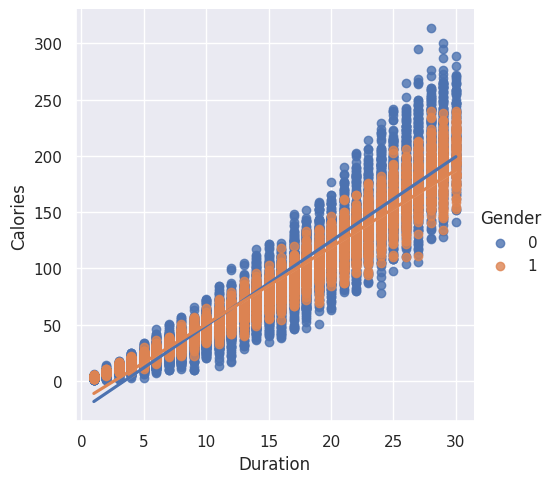

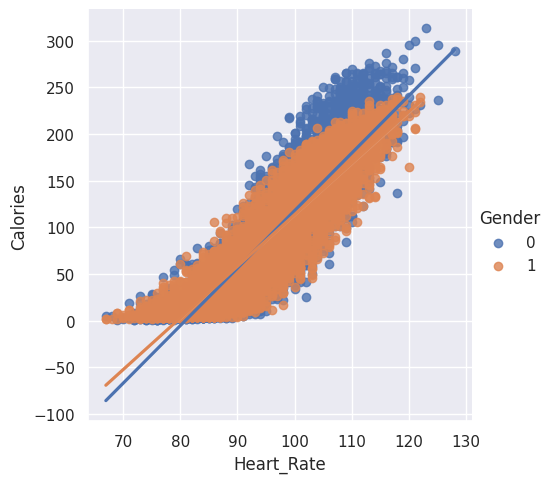

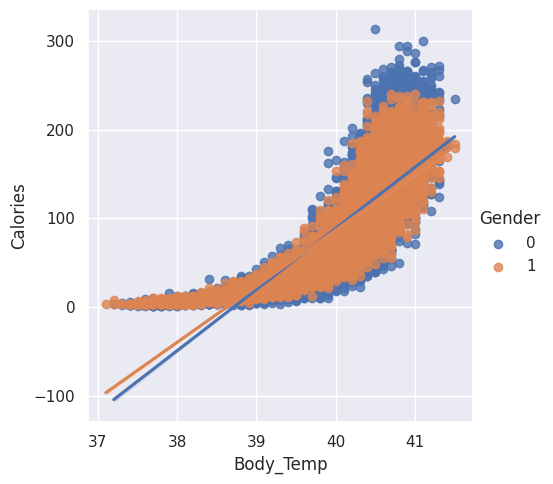

In [28]:
sns.lmplot(data=df, x='Duration', y='Calories', hue='Gender')
sns.lmplot(data=df, x='Heart_Rate', y='Calories', hue='Gender')
sns.lmplot(data=df, x='Body_Temp', y='Calories', hue='Gender')


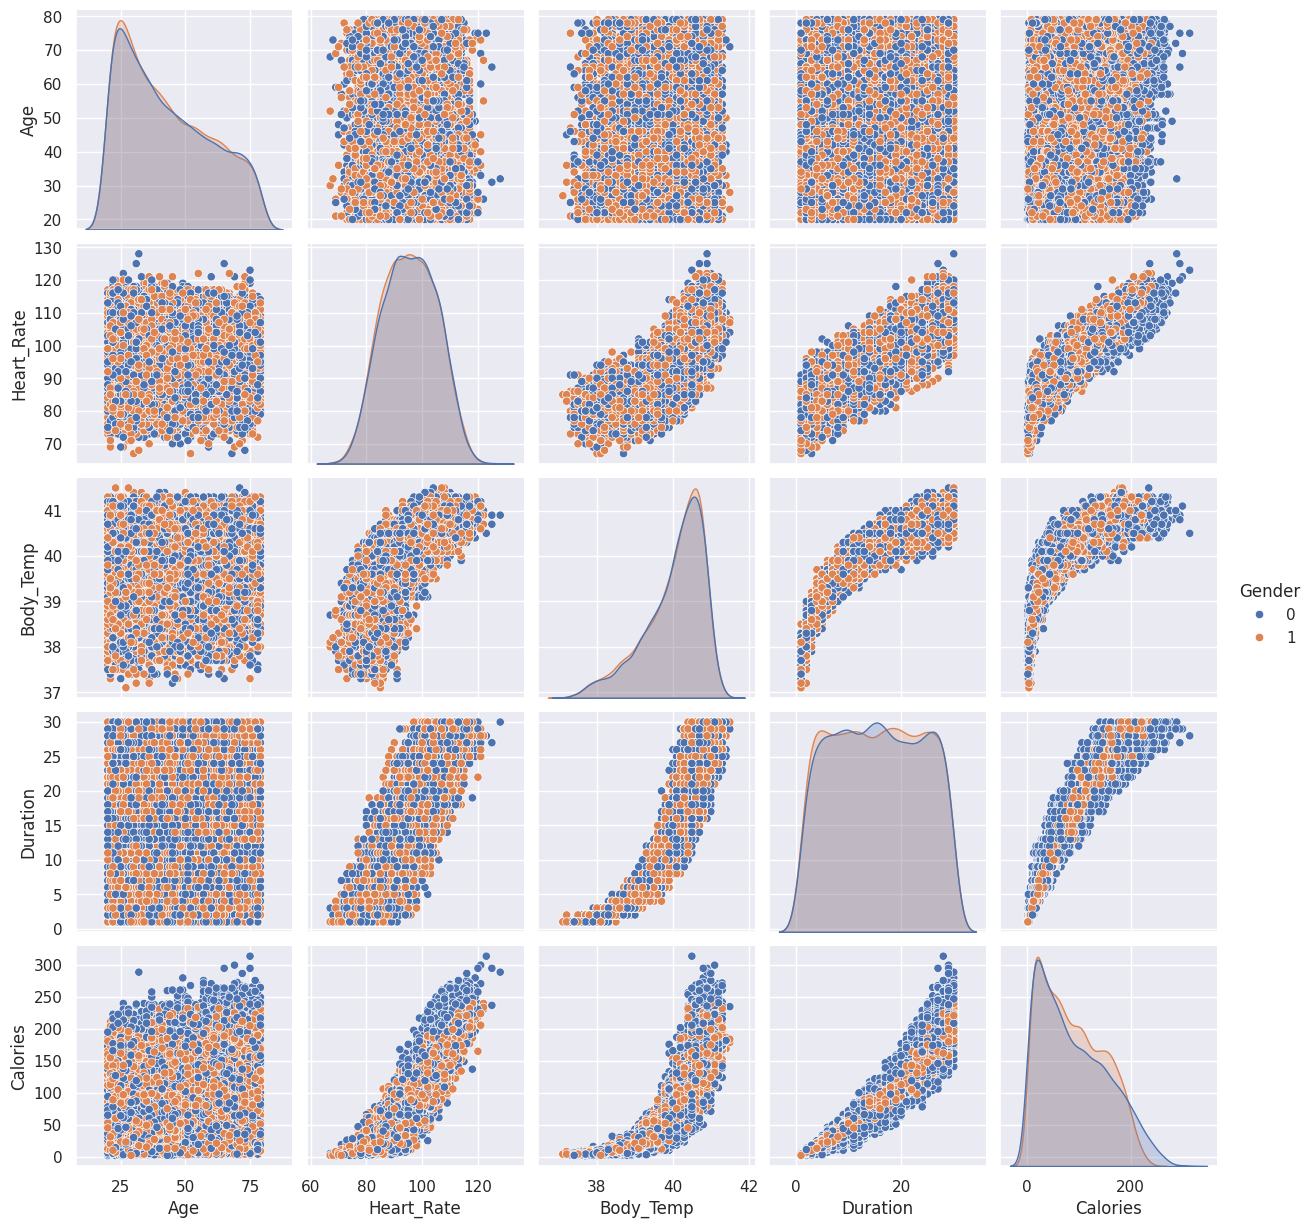

In [30]:
sns.pairplot(df[['Age' , 'Heart_Rate'  ,"Body_Temp" , 'Duration' , 'Calories' , 'Gender']] , hue = 'Gender')
plt.show()

In [31]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

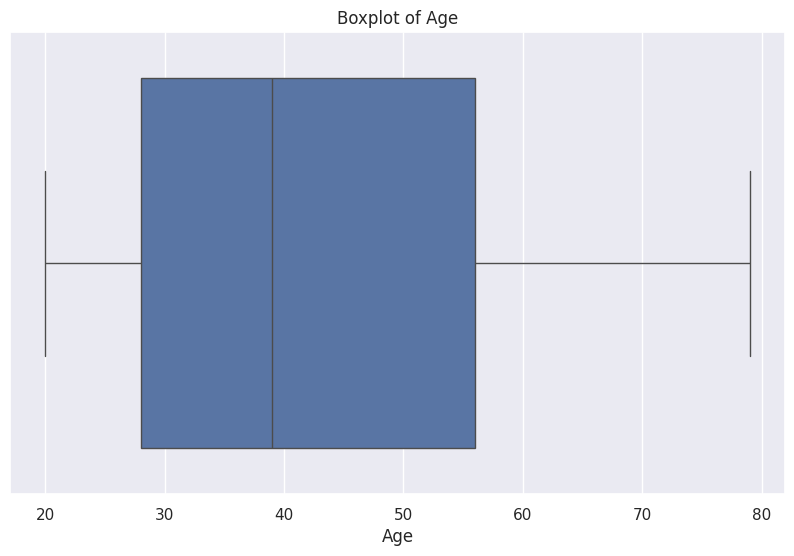

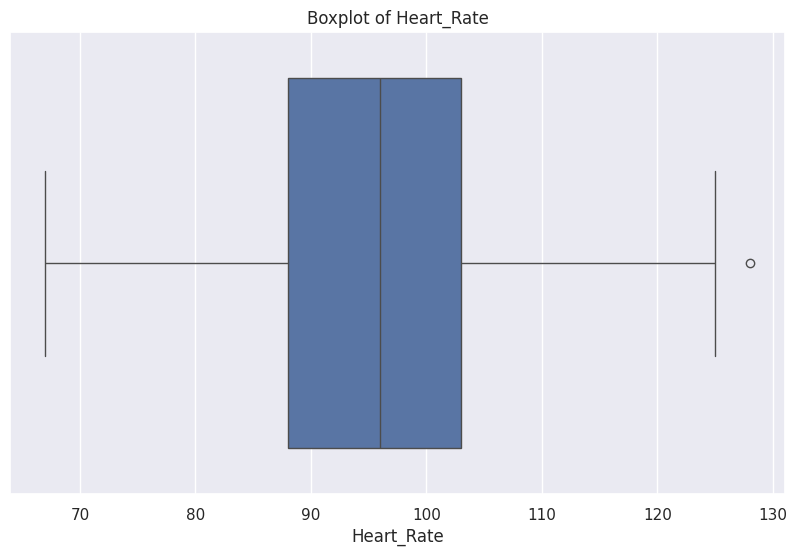

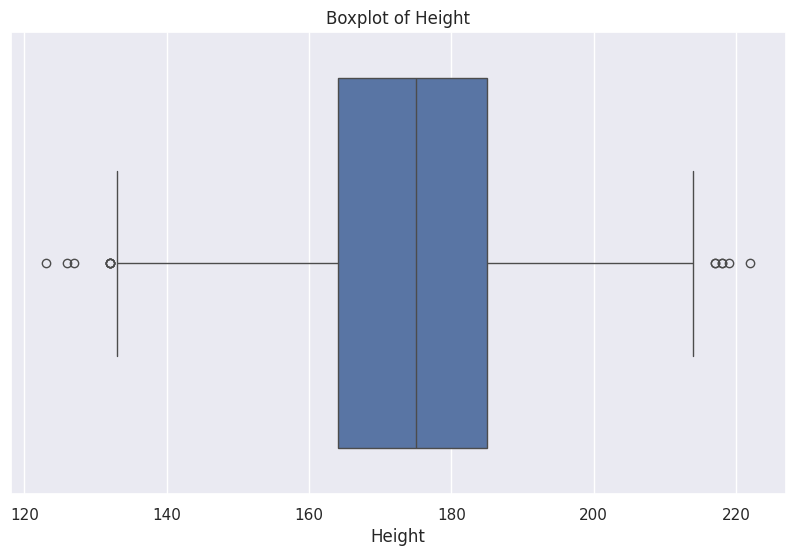

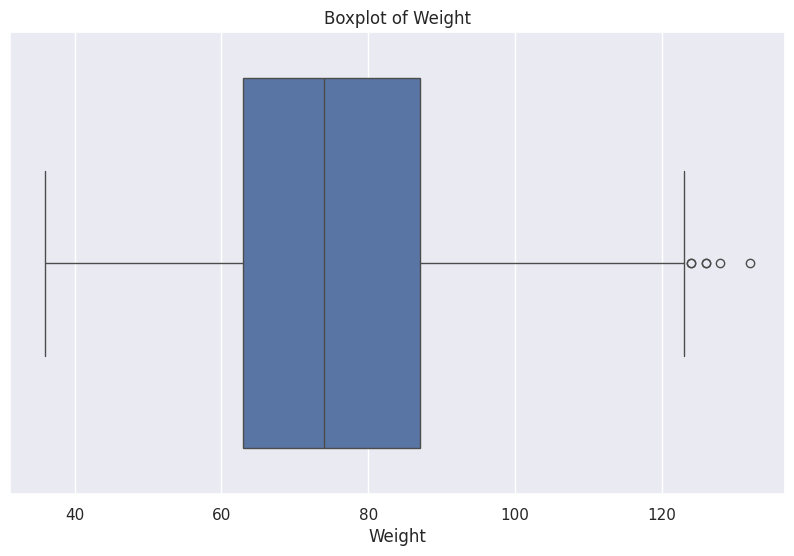

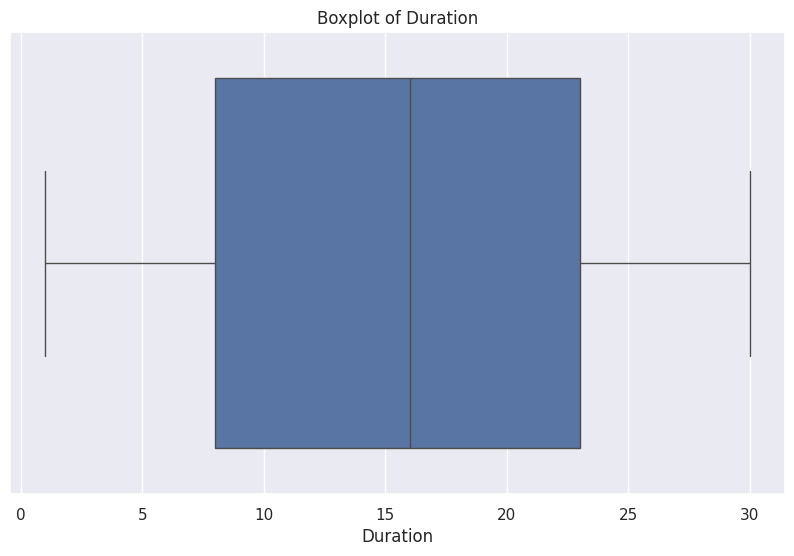

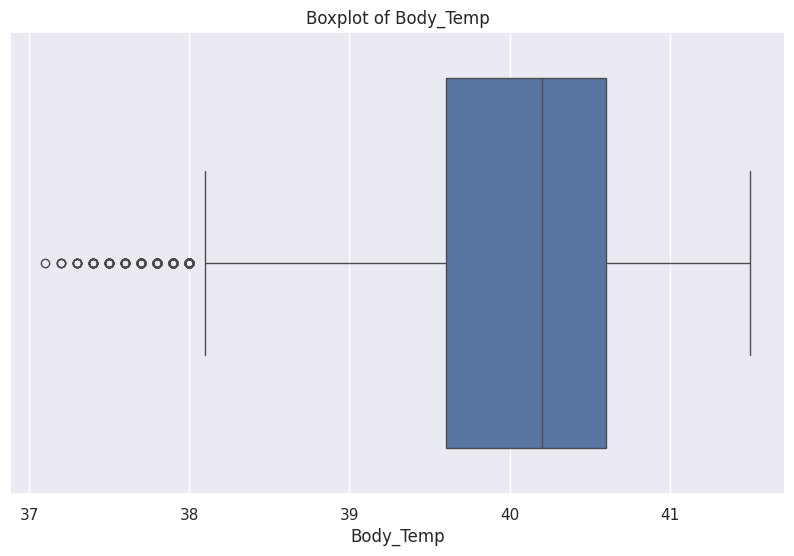

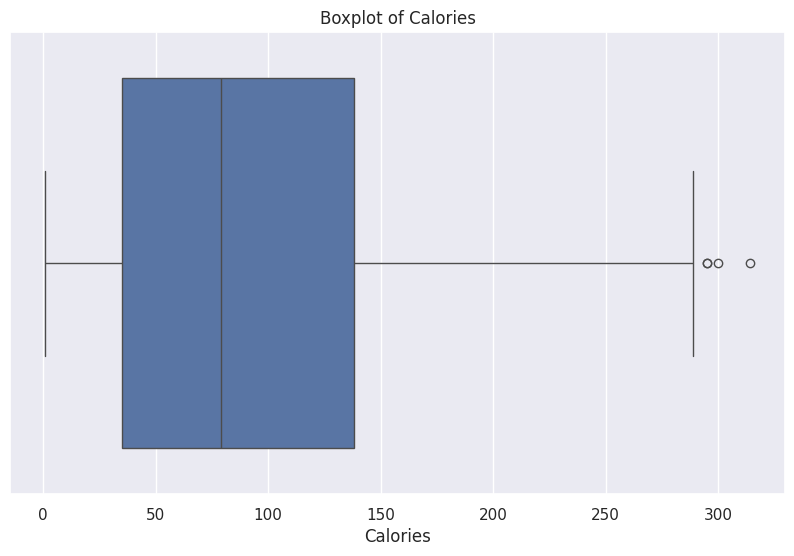

In [33]:
numerical_features = ['Age','Heart_Rate','Height' , 'Weight','Duration','Body_Temp','Calories']
for col in numerical_features:
  plt.figure(figsize=(10 ,6))
  sns.boxplot(data = df , x = col)
  plt.title(f'Boxplot of {col}')
  plt.show()

In [34]:
#seperate the data
X = df.drop(columns=['User_ID' , 'Calories'] , axis = 1)
y = df['Calories']

In [35]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [36]:
print(X.shape , X_train.shape , X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [38]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [39]:
model.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [40]:
y_pred = model.predict(X_test)

In [41]:
print(y_pred)

[172.07645  195.7858    51.708874 ... 121.50776   19.239851 214.43597 ]


In [42]:
from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(y_test , y_pred)
r2_score = r2_score(y_test , y_pred)
print(mse)
print(r2_score)

4.568956111227719
0.9988678909361673
